# Data Visualization and Processing 

By: Kris Ghimire, Thad Schwebke, Walter Lai, and Jamie Vo

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Contents

In [2]:
# Insert the code from Kris to build the index with links to each section

# Business Understanding

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

We have been hearing many news about homicide  lately in the mids of already existing Covid-19 pandemic. Violent crime and homicide have been rising saliently across the US. The number of homicide has almost increase by double digits in many bigger cities such has Chicago, New York, Philadelphia just to name few. To have better understanding about criminal and victim profile , to visualize some interesting relation and to make prediction on if the kind of homicide has been solved or unsolved we decided to pick homicide as a topic for our project.

Just to define simply, homicide is the killing of one person by another. Homicide might or might not be illegal. Legal homicide could be such as person killing intruders without committing crime or solders killing enemies in battle, while the illegal homicide is an intentional murder of one individual by another or if someone involves in the activities. Our data set has two types of crime: Murder or Manslaughter and Manslaughter by Negligence. Murder occurs when one human being unlawfully kills another human being. Murder are broken into degrees, First degree which is willful, deliberate and premeditated murder. Second-degree murder- which do not carry the death penalty. Manslaughter is the act of killing another human being in a way that is less accountable than murder. In other words manslaughter is not as sever crime as murder. Manslaughter is categorized into voluntary and involuntary manslaughter. Voluntary manslaughter is defined as killing of another human being under extreme provocation which typically does not require an intent to kill. For example an individual who kills another individual in self-defense may be charged with voluntary manslaughter if he was the original attacker in the situation.

While involuntary manslaughter is defined as death of another human being due to act of negligence or recklessness of the defendant.For example, a person who drives under the influence of alcohol may hit and kill a pedestrian, although killing him was not his intention.

United States does a poor job in tracking and accounting for its unsolved homicides. According to Scripps Howard News Service study of the FBI’s Uniform Crime Report, across U.S. nearly 185,000 cases of homicides and non-negligent manslaughter were unsolved from 1980 to 2008. The rate at which police clear homicides through arrest has declines year over year. About 4 of every 10 homicides go unsolved each year.As per FBI Uniform Crime Report, currently on average, 40 percent of homicides are unsolved. These rising number of unsolved homicides also known as cold case is a major problem to our society as well as law enforcement as its leaving a growing number of killers out on the streets, undermining the safety in urban neighborhoods and also crumbling the confidence in the criminal justice system.

No one knows all the names of the murder victims because no law enforcement agency in America is assigned to monitor failed homicide investigations by local police departments. Even the official national statistics on murder are actually estimates and projections based upon incomplete reports by police departments that voluntarily choose (or refuse) to participate in federal crime reporting programs.

Keeping all these in mind our primary key in this project is to help classify the cases solved or unsolved based on the data we have.

Our dataset come from the Murder Accountability Project which is a nonprofit group organized in 2015 to educate American on the important of accurately accounting for unsolved homicides. Their projects board of directory is composed of retired law enforcement investigators, investigative journalists, criminologists and other experts on various aspects of homicide.

--There are two predictions we're working towards--
1. Based on attributes of a case (i.e. Year, Month, City, State, Agency, Weapon, Victim attributes, Perpetrator attributes, and Relationship), we can predict if the case will be solved or not.
2. Based on attributes in a case (i.e. Year, Month, City, State, Weapon, and Victim attributes), we can profile the Perpetrator (Age, Race, Ethnicity, and Sex).

In [3]:
# all imported libraries used for analysis
import numpy as np
import pandas as pd 
import os 
import urllib
import copy
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import statsmodels.api as sm
import random
# set color scheme and style for seaborn
sns.set(color_codes=True)
sns.set_style('whitegrid')

In [4]:
df=pd.read_csv('../Data/database.csv')
# display info which includes shape, columns, non-null count, and datatype
# print the number of records and columns
records = len(df)
attributes = df.columns

print(f'No. of Records: {records} \nNo. of Attributes: {len(attributes)}')

# use df.info()

KeyboardInterrupt: 

Imports various libraries used in the analysis of the homicide data

# Data Meaning Type

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

--Data Meaning Type Full Write-up--


--Align data description and sttribute types information from Kris--


In [94]:
df_description = pd.read_excel('../Data/data_description.xlsx')
pd.set_option('display.max_colwidth', 0)
df_description

,Unnamed: 0,Attributes,Description
0,0,Record ID,"Unique record identifier generated by MAP based upon the YEAR, MONTH, INCIDENT and ORI code in the report. Alphanumeric 16-character format (A16)."
1,1,Agency Code,The alphanumeric variable describing the name of the law enforcement agency making the report. (A450).
2,2,Agency Name,"– The one-digit numeric code describing the type of law enforcement agency making the report so that 1=Sheriff, 2=County Police, 3=Municipality, 5=Primary State Law Enforcement usually meaning the State Police, 6=Special Police, 7=Constable, 8=Tribal Police, 9=Regional Police. When using the Comma Separated Values format file (file extension=.csv) the original FBI numbering scheme is replaced with the alphanumeric label. (F1.0)."
3,3,Agency Type,"The one-digit numeric code describing the type of law enforcement agency making the report so that 1=Sheriff, 2=County Police, 3=Municipality, 5=Primary State Law Enforcement usually meaning the State Police, 6=Special Police, 7=Constable, 8=Tribal Police, 9=Regional Police. When using the Comma Separated Values format file (file extension=.csv) the original FBI numbering scheme is replaced with the alphanumeric label. (F1.0)."
4,4,City,An eight-digit numeric variable representing the Census Bureau’s Federal Information Processing Standards (FIPS) code for the Metropolitan Statistical Area from which a record was reported. When using the Comma Separated Values format file (file extension=.csv) the original FIPS coding is replaced with the label indicating the metropolitan area. (F8.0).
5,5,State,Alphanumeric variable describing the original FBI naming and abbreviating scheme for the state of the reporting agency. (A6).
6,6,Year,Year of homicide (or when victim’s body was recovered.) Numeric four digit. (F4.0).
7,7,Month,The month of homicide occurrence or when the victim’s body was recovered.
8,8,Incident,– A three-digit number describing the case number within the month in which a homicide occurred. This does not necessarily correspond to the actual case number used inhouse by police agencies. It is used to assist in building a unique record number for each case and to differentiate each case reported within the same month. (F3.0)
9,9,Crime Type,An alphanumeric variable defining whether the report was “A” = “Murder or Nonnegligent manslaughter” or “B” = “Manslaughter by Negligence.” (A1).


The [Homicide Report dataset](https://www.kaggle.com/murderaccountability/homicide-reports) from Kaggle is read into a dataframe

In [95]:
# data wrangling, clean-up, rename headers, drop columns, change data types, and transforms
# change crime solved values - Yes = 1 and No = 0 
df['Crime Solved']=df['Crime Solved'].replace(to_replace='No',value=0)
df['Crime Solved']=df['Crime Solved'].replace(to_replace='Yes',value=1)

# cleanse the Perpetrator Age
#print('Max age of Perpetrator before:', homicide_df.loc[homicide_df['Perpetrator Age'].apply(lambda x:isinstance(x,(int,float))),'Perpetrator Age'].max())
#print('Min age of Perpetrator before:', homicide_df.loc[homicide_df['Perpetrator Age'].apply(lambda x:isinstance(x,(int,float))),'Perpetrator Age'].min())


df['Perpetrator Age']=df['Perpetrator Age'].replace(to_replace=" ",value=0)
df['Perpetrator Age'] = df['Perpetrator Age'].astype(int)
#homicide_df['Perpetrator Age']=pd.to_numeric(homicide_df['Perpetrator Age'])
index=df[df['Perpetrator Age'] > 98].index
df.drop(index, inplace=True)
df['Perpetrator Age']=df['Perpetrator Age'].replace(to_replace=0,value=df['Perpetrator Age'].median())
print('Max age of Perpetrator after:', df['Perpetrator Age'].max())
print('Min age of Perpetrator after:', df['Perpetrator Age'].min())

# cleanse the Victim Age
print('Max age of Victim before:', df['Victim Age'].max())
print('Min age of Victim before:', df['Victim Age'].min())
df['Victim Age']=df['Victim Age'].replace(to_replace=998,value=df['Victim Age'].median())
print('Max age of Victim after:',df['Victim Age'].max())
print('Min age of Victim after:', df['Victim Age'].min())

# remove records where Relationship, Weapon, Victim & Perpetrator Sex, Race, 
# and Ethinicity are Unknown and Victim & Perpetrator Age is 0


# combine Victim and Perpetrator Race & Ethnicity into new features - Victim_Race_Ethnicity and Perpetrator_Race_Ethnicity


# create bins for Victim and Perpetrator Age in a new feature - Victim_Age_Group and Perpetrator_Age_Group




Max age of Perpetrator after: 98
Min age of Perpetrator after: 1
Max age of Victim before: 998
Min age of Victim before: 0
Max age of Victim after: 99
Min age of Victim after: 0


The Perpetrator Age column contained ages of 0 and an empty string.  They were imputed with the median perpetrator age.
The data dictionary specified that for Victim Ages, 'A value of 999 represents victims whose age was not reported, usually
because the victim was unidentified and the age was unknown.'  The median victim ages were imputed for victim ages of 998. 

In [96]:

# group Relationship into logical bins - Relationship_Group
df.loc[(df['Relationship'] == 'Wife') | (df['Relationship'] == 'Ex-Wife') |
             (df['Relationship'] == 'Girlfriend') |
             (df['Relationship'] == 'Common-Law Wife'), 'Relationship_Group'] = 'Female Partner'

df.loc[(df['Relationship'] == 'Husband') | (df['Relationship'] == 'Ex-Husband') |
             (df['Relationship'] == 'Boyfriend') | 
             (df['Relationship'] == 'Common-Law Husband'), 'Relationship_Group'] = 'Male Partner'

df.loc[(df['Relationship'] == 'Boyfriend/Girlfriend') & (df['Victim Sex'] == 'Female'),
             'Relationship_Group'] = 'Female Partner'

df.loc[(df['Relationship'] == 'Boyfriend/Girlfriend') & ((df['Victim Sex'] == 'Male') |
            (df['Victim Sex'] == 'Unknown')) , 'Relationship_Group'] = 'Male Partner'

df.loc[(df['Relationship'] == 'Father') | (df['Relationship'] == 'In-Law') |
             (df['Relationship'] == 'Mother') | (df['Relationship'] == 'Stepfather') |
             (df['Relationship'] == 'Stepmother'), 'Relationship_Group'] = 'Parent'

df.loc[(df['Relationship'] == 'Daughter') | (df['Relationship'] == 'Son') |
             (df['Relationship'] == 'Stepdaughter') | 
             (df['Relationship'] == 'Stepson'), 'Relationship_Group'] = 'Children'

df.loc[(df['Relationship'] == 'Brother') | (df['Relationship'] == 'Sister'),
             'Relationship_Group'] = 'Sibling'

df.loc[(df['Relationship'] == 'Employee') | (df['Relationship'] == 'Employer') ,
             'Relationship_Group'] = 'Work'

df.loc[(df['Relationship'] == 'Family') , 'Relationship_Group'] = 'Other Family'

df.loc[(df['Relationship'] == 'Friend') , 'Relationship_Group'] = 'Friend'

df.loc[(df['Relationship'] == 'Neighbor') , 'Relationship_Group'] = 'Neighbor'

df.loc[(df['Relationship'] == 'Stranger') , 'Relationship_Group'] = 'Stranger'

df.loc[(df['Relationship'] == 'Acquaintance') , 'Relationship_Group'] = 'Acquaintance'

# combine City and State into a new feature - City_State


# combine Month and Year into a new feature - Month_Year


# drop Incident feature
if 'Incident' in df:
    del df['Incident']


The Relationship column contained 28 levels.  We wanted to decrease the number of levels to minimize the dimensions of our dataset to reduce model overfitting. 

Summarized what was completed in this step.

Summarized what was completed in this step.

Summarized what was completed in this step.

## Data Quality

 Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific.


--Data Quality Full Write-up--

TODO:

Find out why certain Relation_Groups have NaN, probably because no observations in those groups.



In [97]:
# check for null values using isnull().sum() and clean-up null values
# check for null values
df.isnull().sum()

Record ID                0     
Agency Code              0     
Agency Name              0     
Agency Type              0     
City                     0     
State                    0     
Year                     0     
Month                    0     
Crime Type               0     
Crime Solved             0     
Victim Sex               0     
Victim Age               0     
Victim Race              0     
Victim Ethnicity         0     
Perpetrator Sex          0     
Perpetrator Age          0     
Perpetrator Race         0     
Perpetrator Ethnicity    0     
Relationship             0     
Weapon                   0     
Victim Count             0     
Perpetrator Count        0     
Record Source            0     
Relationship_Group       272950
dtype: int64

Summarized what was completed in this step.

In [98]:
# check for rows containing duplicate data and clean-up duplicate rows
df_duplicates = df.groupby(df.columns.tolist(),as_index=False).size()
#df_duplicates.loc[df_duplicates['size'] > 1]
df_duplicates[df_duplicates>1]

TypeError: '>' not supported between instances of 'str' and 'int'

Summarized what was completed in this step.

Summarized what was completed in this step.

<AxesSubplot:xlabel='Perpetrator Age'>

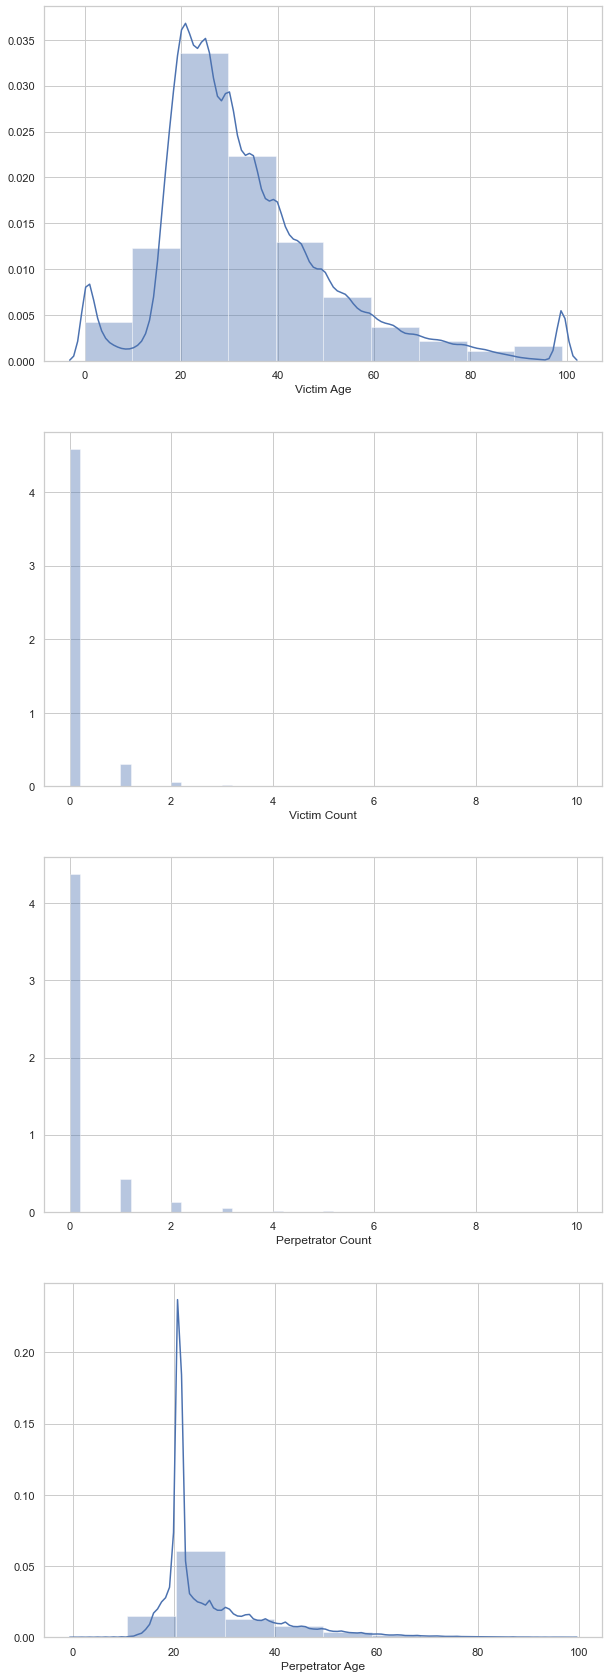

In [99]:
# histograms to look at the distributions
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
#sns.distplot(df['Incident'],ax=axes[0], bins=15)
sns.distplot(df['Victim Age'],ax=axes[0], bins=10)
sns.distplot(df['Victim Count'],ax=axes[1])
sns.distplot(df['Perpetrator Count'],ax=axes[2])
sns.distplot(df['Perpetrator Age'],ax=axes[3], bins=10)

Summarized what was completed in this step.

In [100]:
# check for outliers using quantiles and IQR

Summarized what was completed in this step.

In [101]:
# create a pairplot for continuous variables looking for outliers 

Summarized what was completed in this step.

In [102]:
# Violin plots to compare distributions between groups

Summarized what was completed in this step.

Summarized what was completed in this step.

## Simple Statistics

Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.


--Simple Statistics Full Write-up--
TODO: 

In [103]:
# count, mean, standard deviation, minimum and maximum values and the quantities for continuous variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Record ID,638364.0,319208.464470,184304.583460,1.0,159595.75,319198.5,478813.25,638454.0
Year,638364.0,1995.800069,9.927577,1980.0,1987.00,1995.0,2004.00,2014.0
Crime Solved,638364.0,0.702004,0.457378,0.0,0.00,1.0,1.00,1.0
Victim Age,638364.0,33.555949,17.778483,0.0,22.00,30.0,41.00,99.0
Perpetrator Age,638364.0,27.428027,11.349894,1.0,21.00,21.0,31.00,98.0
Victim Count,638364.0,0.123342,0.537763,0.0,0.00,0.0,0.00,10.0
Perpetrator Count,638364.0,0.185216,0.585498,0.0,0.00,0.0,0.00,10.0


Summarized what was completed in this step.

In [104]:
# total number of victim count
print('Total number victims=',df['Victim Count'].sum())

Total number victims= 78737


Summarized what was completed in this step.

In [105]:
# basic statistics for categorical features
df_categorical = df.select_dtypes(include='object')
df_categorical.describe()

,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Victim Sex,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source,Relationship_Group
count,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,365414
unique,12003,9216,7,1782,51,12,2,3,5,3,3,5,3,28,16,2,11
top,NY03030,New York,Municipal Police,Los Angeles,California,July,Murder or Manslaughter,Male,White,Unknown,Male,White,Unknown,Unknown,Handgun,FBI,Acquaintance
freq,38416,38416,492958,44510,99782,58689,629248,494055,317384,368223,399504,218228,446324,272950,317461,616581,126013


Summarized what was completed in this step.

In [17]:
# get all levels per categorical attribute
df_categorical_levels = pd.DataFrame()
df_categorical_levels['Attribute'] = df_categorical.columns
df_categorical_levels['Levels'] = ''
df_categorical_levels['Levels_Count'] = ''
df_categorical_levels['Unknown_Count'] = ''

# populate the dataframe with categorical levels and count of each category
for i, row in df_categorical_levels.iterrows():
    attribute = row['Attribute']
    df_categorical_levels.at[i,'Levels'] = df[attribute].unique()
    df_categorical_levels.at[i,'Levels_Count'] = len(df[attribute].unique())
    try:
        df_categorical_levels.at[i,'Unknown_Count'] = df.groupby(attribute).count().loc['Unknown'][0]
    except: 
        df_categorical_levels.at[i,'Unknown_Count'] = 0

In [18]:
# show the dataframe
df_categorical_levels.sort_values(by='Unknown_Count', ascending = False)

,Attribute,Levels,Levels_Count,Unknown_Count
12,Perpetrator Ethnicity,"[Unknown, Not Hispanic, Hispanic]",3,446324
9,Victim Ethnicity,"[Unknown, Not Hispanic, Hispanic]",3,368223
13,Relationship,"[Acquaintance, Unknown, Wife, Stranger, Girlfriend, Ex-Husband, Brother, Stepdaughter, Husband, Sister, Friend, Family, Neighbor, Father, In-Law, Son, Ex-Wife, Boyfriend, Mother, Common-Law Husband, Common-Law Wife, Stepfather, Stepson, Stepmother, Daughter, Boyfriend/Girlfriend, Employer, Employee]",28,272950
11,Perpetrator Race,"[Native American/Alaska Native, White, Unknown, Black, Asian/Pacific Islander]",5,195988
10,Perpetrator Sex,"[Male, Unknown, Female]",3,190313
14,Weapon,"[Blunt Object, Strangulation, Unknown, Rifle, Knife, Firearm, Shotgun, Fall, Handgun, Drowning, Suffocation, Explosives, Fire, Drugs, Gun, Poison]",16,33180
8,Victim Race,"[Native American/Alaska Native, White, Black, Unknown, Asian/Pacific Islander]",5,6675
7,Victim Sex,"[Male, Female, Unknown]",3,984
1,Agency Name,"[Anchorage, Juneau, Nome, Bethel, North Slope Borough, Kenai, Alaska State Police, Jefferson, Bessemer, Birmingham, Fairfield, Gardendale, Leeds, Homewood, Brighton, Hueytown, Warrior, Mobile, Prichard, Chickasaw, Saraland, Satsuma, Montgomery, Autauga, Baldwin, Robertsdale, Daphne, Barbour, Blount, Bullock, Butler, Greenville, Calhoun, Anniston, Oxford, Chambers, Lafayette, Chilton, Choctaw, Clarke, Thomasville, Cleburne, Enterprise, Colbert, Tuscumbia, Conecuh, Coosa, Rockford, Andalusia, Crenshaw, Cullman, Dale, Ozark, Dallas, Selma, Collinsville, Elmore, Tallassee, Atmore, Brewton, Attalla, Gadsden, Fayette, Franklin, Red Bay, Geneva, Greene, Houston, Dothan, Jackson, Scottsboro, Lamar, Lauderdale, Florence, Lawrence, Lee, Auburn, Opelika, Limestone, Athens, Lowndes, Tuskegee, Madison, Huntsville, New Hope, Owens Crossroads, Marengo, Hackleburg, Marshall, Albertville, Morgan, Decatur, Hartselle, Perry, Marion, Pickens, Troy, Russell, Phenix City, St. Clair, ...]",9216,47
15,Record Source,"[FBI, FOIA]",2,0


Summarized what was completed in this step.

In [19]:
# include any pertinant crosstabs with percentages

<AxesSubplot:xlabel='Victim Race', ylabel='Perpetrator Race'>

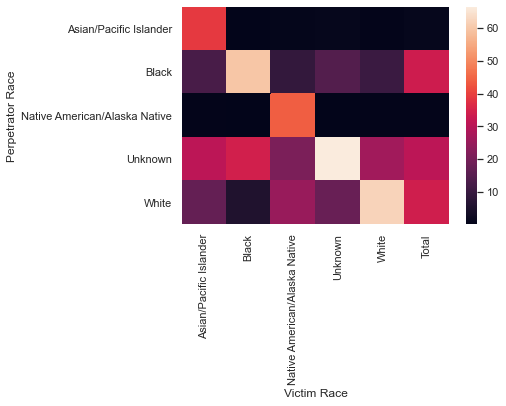

In [20]:
ct2 = pd.crosstab(df['Perpetrator Race'],
                 df['Victim Race'],
                margins=True,
                margins_name='Total',
                normalize='columns')*100 # to percentage 
sns.heatmap(ct2)

<AxesSubplot:xlabel='Victim Sex', ylabel='Perpetrator Sex'>

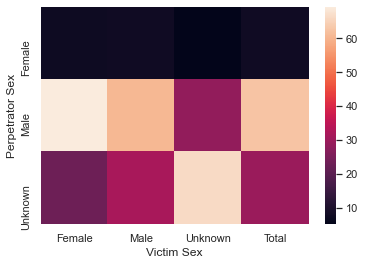

In [21]:
ct_sex = pd.crosstab(df['Perpetrator Sex'],
                 df['Victim Sex'],
                margins=True,
                margins_name='Total',
                normalize='columns')*100 # to percentage 
sns.heatmap(ct_sex)

Summarized what was completed in this step.

## Visualize Attributes

Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.

Visualize attributes is just individual attributes


--TODO: 
  Determine which categorical variable is the most distributed in all its levels.  For example, Crime Type which is not distributed at all; Virtually all the homicides are of 1 type.
  





Checklist of important attributes to visualize (use count of Record ID)
* Victim (Sex, Age, Race_Ethnicity) - bar plot COMPLETED IN EXPLORE JOINT ATTRIUBREST
* Crime Type - pie chart COMPLETED
* Weapons - horizontal bar plot  COMPLETED
* Perpetrator (Sex, Age, Race_Ethnicity) - bar plot COMPLETED IN EXPLORE JOINT ATTRIBUTES
* State - map plot  COMPLETED
* City_State - map plot 
* 
* Month_Year - line plot 

Perpetrator and Victim Count
- Are there more perpetrators than victims? 

Weapon
- What weapons are most and least commonly used for murder over the time period?

Time series for homicede incidences 
- Has the homocide rates decrease from 1980-2014? COMPLETED IN EXPLORE ATTRIBUTES AND CLASSES STATE PLOT
- What states have the highest and lowest number of incidences from 1980-2014? PARTIALLY COMPLETE SUGGEST SKIP 
- What states had the highest and lowest murder rate in 2014? 

Age distribution
- What age group is the most predominent for perpetrators and victims? 
- Has the age distribution change over the years? 
- What ages encompass the most perpetrators? COMPLTEED IN JOINT ATTRIBUTES
        
Race and sex 
- Perpetrator and victim sex distribution for each race? 
- What is the age group distribution for each race? 
- What perpetrator and victim race has the highest homicide incidences?
Relationship VARIABLE
- What relationship result in most murders from 1980-2014?
- What victim relationship result in most murders from 1980-2014?
- What relationship group has the most homicides?


<AxesSubplot:title={'center':'Victims sex'}, ylabel='Victim Sex'>

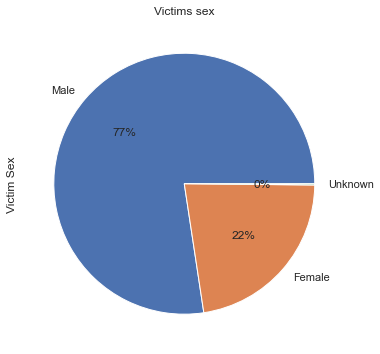

In [22]:
# Victim (Sex, Age, Race_Ethnicity) - bar plot
# Victims sex
v_sex = df['Victim Sex'].value_counts()
v_sex.plot.pie(autopct='%1.0f%%',figsize=(6, 6), title = 'Victims sex')

Summarized what was completed in this step.

<AxesSubplot:title={'center':'Crime Types'}, ylabel='Crime Type'>

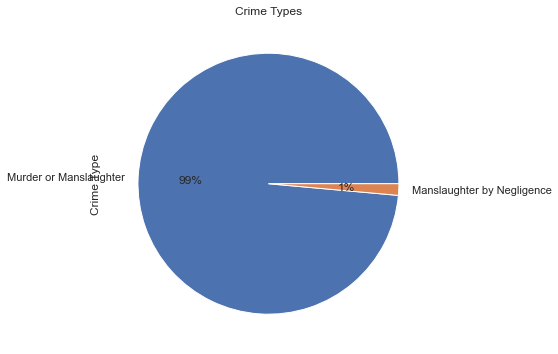

In [23]:
# Crime Type - pie chart
ct = df['Crime Type'].value_counts()
ct.plot.pie(autopct='%1.0f%%', figsize=(6, 6), title = 'Crime Types')

Summarized what was completed in this step.

Text(0.5, 1.0, 'Number Homicides By Weapon')

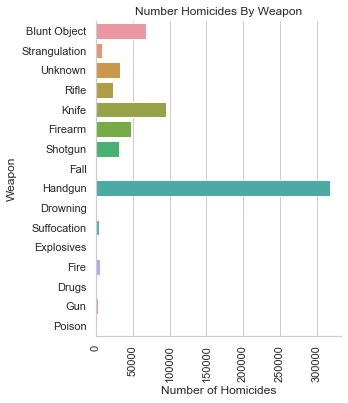

In [24]:
# Weapons - horizontal bar plot
weapon_plot=sns.catplot(kind='count',y='Weapon',data=df,orient='h')
plt.xticks(rotation=90)
weapon_plot.set(xlabel='Number of Homicides')
plt.title('Number Homicides By Weapon')

Summarized what was completed in this step.

<AxesSubplot:title={'center':'Perpetrators sex'}, ylabel='Perpetrator Sex'>

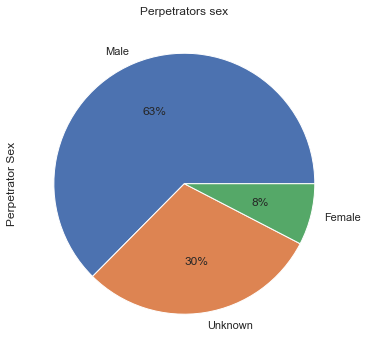

In [25]:
# Perpetrator (Sex, Age, Race_Ethnicity) - bar plot
# Perpetrator sex
p_sex = df['Perpetrator Sex'].value_counts()
p_sex.plot.pie(autopct='%1.0f%%', figsize=(6, 6), title = 'Perpetrators sex')

Summarized what was completed in this step.

In [26]:
# City_State - map plot

Summarized what was completed in this step.

<AxesSubplot:ylabel='Crime Solved'>

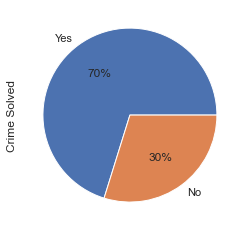

In [27]:
# Crime Solved - pie chart
solved_ct=df['Crime Solved'].value_counts()
solved_ct.index = ['Yes','No']
solved_ct.plot.pie(autopct='%1.0f%%')

Summarized what was completed in this step.

Summarized what was completed in this step.

In [28]:
# Month_Year - line plot

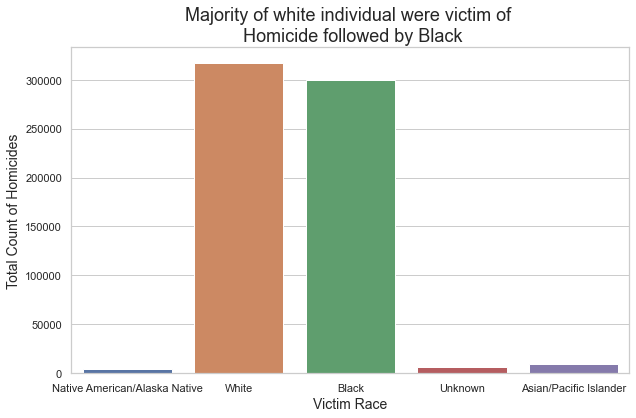

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,
              x='Victim Race',
              #y='Crime Type',
              #hue='Crime Type',
              #palette=['#432371',"#FAAE7B"] 
             )
plt.xlabel('Victim Race',size=14)
plt.ylabel('Total Count of Homicides',size=14)
plt.title('Majority of white individual were victim of \n Homicide followed by Black',size=18)
plt.show()

Summarized what was completed in this step.

## Explore Joint Attributes

Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

Explore joint attributes is the comparing of multiple attributes (pairwise and correlation are good options)

TODO:

    For every city or state determine the profile of the most common perpetrator: Race, Sex, Age

    Do certain races, genders, or age groups commit crimes at certain months?

    Titles for every plot

    x-axis label for the Perpetrator_age_range Plot
      
       Instead of Record ID for the Plotly Victim Age, Sex, Year it should be 'Count of Homicides"
         
   

--Explorer Joint Attributes Full Write-up--
Use scatter plots for 2 variable comparison
Use bubble plots for 3 variable comparison
Use line plots for time lines
Use geo map plots for locations

Correlation
- How is the homicide data correlated

Text(0.5, 1.0, 'Correlation Between Numerical Variables')

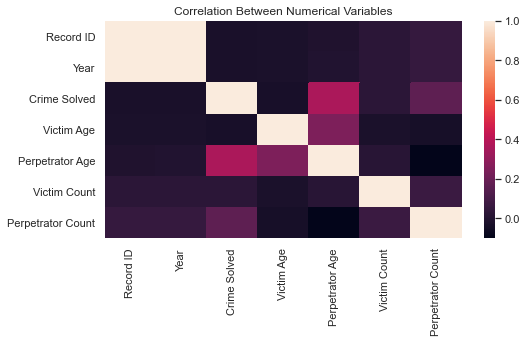

In [30]:
# Correclation plot
plt.figure(figsize=(8,4))
sns.heatmap(df.corr())
plt.title('Correlation Between Numerical Variables')

Text(0.5, 1.0, 'Age and Sex of Perpetrators')

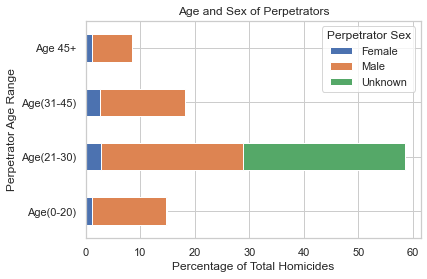

In [31]:
df['Perpetrator_age_range'] = pd.cut(df['Perpetrator Age'],[0,20,30,45,1e6],3,
                                     
                                     
                                           labels=['Age(0-20)','Age(21-30)','Age(31-45)','Age 45+'])
ct_Perpetrator_age_range = pd.crosstab(df.Perpetrator_age_range,
           df['Perpetrator Sex'],
           
           normalize=True).round(4)*100

ct_Perpetrator_age_range.plot(kind='barh',
                             stacked=True,
                             )
plt.xlabel('Percentage of Total Homicides')
plt.ylabel('Perpetrator Age Range')
plt.title('Age and Sex of Perpetrators')

Summarized what was completed in this step.

Summarized what was completed in this step.

In [32]:
# Create a plot to compare actual crime rate numbers to the homicide numbers to see if they follow the same pattern
# Need crime data from https://www.macrotrends.net/states/louisiana/murder-homicide-rate-statistics

Summarized what was completed in this step.

Summarized what was completed in this step.

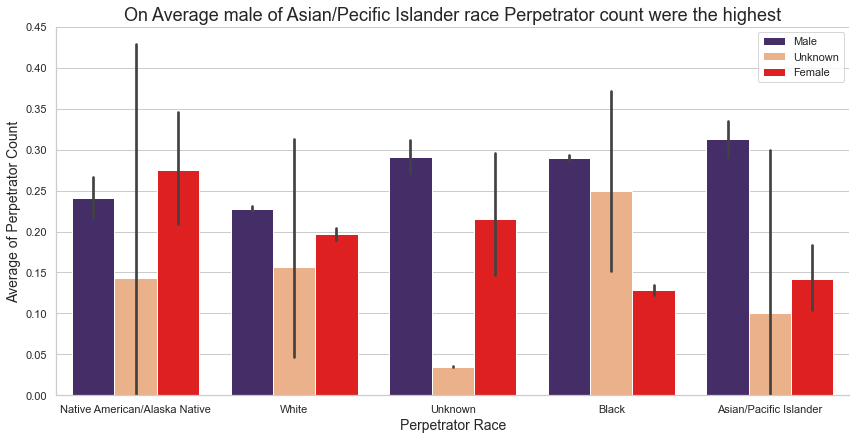

In [33]:

sns.catplot(x='Perpetrator Race',
           y='Perpetrator Count',
           kind='bar', 
           height=6,
            aspect=2,
            hue='Perpetrator Sex', 
            palette=['#432371',"#FAAE7B",'red'],
            legend=False,
           data=df)
plt.xlabel('Perpetrator Race',size=14)
plt.ylabel('Average of Perpetrator Count',size=14)
plt.title('On Average male of Asian/Pecific Islander race Perpetrator count were the highest',size=18)
plt.legend() 
plt.show()

In [34]:
# Victim (Sex, Age, Race_Ethnicity) vs Crime Solved
df_victime_gender = df.groupby(['Victim Age', 'Victim Sex', 'Year']).count().reset_index()
fig=px.scatter(df_victime_gender, x="Victim Age", y="Record ID", animation_frame="Year", animation_group="Victim Age",
           size="Record ID", color="Victim Sex", hover_name="Record ID",
           log_x=False, size_max=20, range_x=[0,100], range_y=[0,1200])
fig.update_yaxes(title_text='Number of Homicides')
fig.update_layout(
    title="Sex of Victims Across Time")
fig.show()

In [35]:
states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhodes Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
df_state = df.groupby('State').count().reset_index()

df_state['State_Abb'] = [states[full_state] for full_state in df_state['State']]



In [36]:
# State - map plot
# heat map of states 
fig = px.choropleth(locations=df_state['State_Abb'], 
                    locationmode="USA-states", 
                    color=df_state['Record ID'], 
                    color_continuous_scale='portland',
                    scope="usa")
fig.update_layout(
    title_text = 'Homicide Rates per State',
    geo_scope='usa', # limite map scope to USA
)
fig.show()

California, Texas, New York, and Florida are the leading states with homocide rates.

Summarized what was completed in this step.

Summarized what was completed in this step.

## Explore Attributes and Class

Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

Prediction can include 1 or more attributes (i.e. Perpetrator age and race to predict the profile of a murder based on other attributes

TODO: Plots of victim sex,age,race versus crime solved & perpetrator sex,age,race versus crime solved 

--Explore Attributes and Class Full Write-up--

Checklist of important attributes to visualize (use count of Record ID)
* Victim (Sex, Age, Race_Ethnicity) vs Crime Solved
* Weapons vs Crime Solved  COMPLETED
* Perpetrator (Sex, Age, Race_Ethnicity) vs Crime Solved
* Perpetrator (Sex, Age, Race_Ethnicity) vs Crime Type
* State vs Crime Solved
* State vs Crime Type
* City_State vs Crime Type
* City_State vs Crime Solved
* Agency Type vs Crime Solved COMPLETED

Summarized what was completed in this step.

In [37]:
# Weapons vs Crime Solved
# Create Data structure like this Gun: 0.20 Yes, Knife 0.5 Yes
weapon_solved_series=df.groupby(['Weapon','Crime Solved'])['Record ID'].count()/df.groupby(['Weapon'])['Record ID'].count()
weapon_solved_df=weapon_solved_series.reset_index()
#sns.catplot(kind='bar',x='Weapon',y='Crime Solved',data=df)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

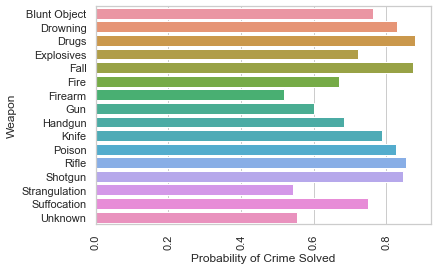

In [38]:
sns.barplot(y='Weapon',x='Record ID', data=weapon_solved_df[weapon_solved_df['Crime Solved']==1],orient='h').set_xlabel('Probability of Crime Solved')
plt.xticks(rotation=90)


Summarized what was completed in this step.

Summarized what was completed in this step.

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

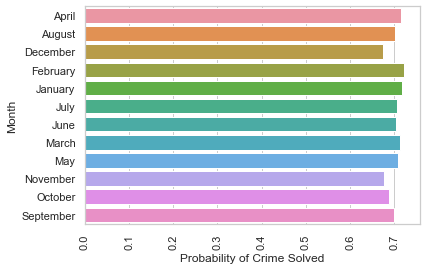

In [39]:
month_solved_series=df.groupby(['Month','Crime Solved'])['Record ID'].count()/df.groupby(['Month'])['Record ID'].count()
month_solved_df=month_solved_series.reset_index()
sns.barplot(y='Month',x='Record ID', data=month_solved_df[month_solved_df['Crime Solved']==1],orient='h').set_xlabel('Probability of Crime Solved')
plt.xticks(rotation=90)

Text(0.5, 0, 'Percentage of Total Homicides')

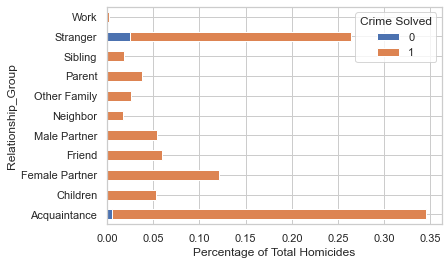

In [40]:
ct_relationship = pd.crosstab(df['Relationship_Group'],
           df['Crime Solved'],
           
           normalize=True)

ct_relationship.plot(kind='barh',
                             stacked=True,
                             )
plt.xlabel('Percentage of Total Homicides')

Summarized what was completed in this step.

In [41]:
# State vs Crime Type

Summarized what was completed in this step.

In [42]:
# City_State vs Crime Type

Summarized what was completed in this step.

In [43]:
# City_State vs Crime Solved

Summarized what was completed in this step.

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

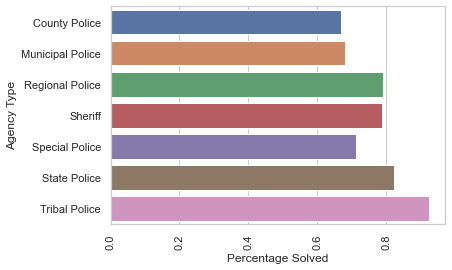

In [44]:
# Agency Type vs Crime Solved
agency_solved_df = df.groupby(['Agency Type','Crime Solved'])['Record ID'].count()/df.groupby(['Agency Type'])['Record ID'].count()
agency_solved_df=agency_solved_df.reset_index()
 
sns.barplot(y='Agency Type',x='Record ID', data=agency_solved_df[agency_solved_df['Crime Solved']==1],orient='h').set_xlabel('Percentage Solved')
plt.xticks(rotation=90)

Summarized what was completed in this step.

In [45]:
df_homicides_per_year = df.groupby('Year').count().reset_index()
df_homicides_per_year_solved = df.groupby(['Year', 'Crime Solved']).count().reset_index()
#df_homicides_per_year['Record ID']

In [46]:
# Create traces
solved_y = df_homicides_per_year_solved.loc[df_homicides_per_year_solved['Crime Solved'] == 1]
unsolved_y = df_homicides_per_year_solved.loc[df_homicides_per_year_solved['Crime Solved'] == 0]

df_homicides_solved = pd.DataFrame()
df_homicides_solved['Year'] = df_homicides_per_year['Year']
df_homicides_solved['Unsolved'] = unsolved_y['Record ID'].values
df_homicides_solved['Solved'] = solved_y['Record ID'].values
df_homicides_solved['Total Homicides'] = df_homicides_per_year['Record ID']
# new variable creations
df_homicides_solved['Unsolved_Solved_Diff'] = df_homicides_solved['Solved'] - df_homicides_solved['Unsolved']
df_homicides_solved['Diff_Percentage'] = round((df_homicides_solved['Unsolved_Solved_Diff']/df_homicides_solved['Total Homicides'])*100,2)

In [47]:
from plotly.subplots import make_subplots
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df_homicides_per_year['Year'], y=df_homicides_per_year['Record ID'],
                    mode='lines+markers',
                    name='Homicide Rates',
                        ),secondary_y=False)
#fig.add_trace(go.Scatter(x=solved_y['Year'], y=solved_y['Record ID'],
#                    mode='lines+markers',
 #                   name='Solved Homicides'))
#fig.add_trace(go.Scatter(x=unsolved_y['Year'], y=unsolved_y['Record ID'],
 #                   mode='lines+markers',
  #                  name='Unsolved Homicides'))


fig.add_trace(go.Scatter(x=df_homicides_solved['Year'], y=df_homicides_solved['Diff_Percentage'],
                        mode='lines+markers',
                        name='%Difference<br>Solved VS Unsolved',
                       ), secondary_y=True)

fig.update_layout(
    title={
        'text': "Homicides Per Year",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Year",
    yaxis_title=" Number of Homicides")
fig.update_yaxes(title_text="Percent Difference Solved Vs UnSolved", secondary_y=True)
fig.show()

Summarized what was completed in this step.

Summarized what was completed in this step.

Decision Tree
- Can we predict whether the crime will be solved or unsolved for victims?

## New Features

Are there other features that could be added to the data or created from existing features? Which ones?

  Kris has already added df['Perpetrator_age_range']


New features - can we do something to clean up city, state, and agency? (qcut in pandas)

--New Features Full Write-up--

--New features were created in the Data Meaning Type section we ust need to do the write=up for them--
Victim_Race_Ethnicity
Perpetrator_Race_Ethnicity
Victim_Age_Group
Perpetrator_Age_Group
Relationship_Group
City_State
Month_Year

## Exceptional

Include PCA and fit a model for exceptional points

Initial view of the dataset shows that headers are descriptive enough and won't require any changes. However, we need to look at the equivalent of a N/A in the Perpetrator and Victim Age columns. The N/A equivalent is 0.

In [48]:
df['Crime Solved']=df['Crime Solved'].apply(lambda x: 'Yes' if x==1 else 'No' )
df_copy=df
#df=df_copy to do it on the whole dataset


In [49]:
# resample 100 records




df=resample(df_copy,replace=False,n_samples=50,random_state=123)

df_categorical= pd.concat([df_categorical,df_copy['Crime Solved']],axis=1)



Summarized what was completed in this step.

In [50]:
# Function to create dummy variables
def dummy_code(col, df): # input the column names and dataframe
    df_dummy = pd.DataFrame()
    for val in col:
        df_dummy_temp = pd.get_dummies(df[val], prefix=val)
        df_dummy = pd.concat([df_dummy, df_dummy_temp], axis=1, sort=False)
    return df_dummy

In [51]:
# select columns for dummy coding
cat_col = df_categorical.columns.values
categorical = np.delete(cat_col, [0,1])

In [52]:
# call function for dummy coding variables
df_dummy = dummy_code(categorical, df)

In [53]:
continuous_col = list(df.describe().columns.values)
df_continuous = df[continuous_col]
df_dummy = df_dummy.merge(df_continuous, on=None, left_index=True, right_index=True, how='outer')
df_dummy = df_dummy.merge(df[['Agency Name', 'Agency Code']], on=None, left_index=True, right_index=True, how='outer')

In [54]:
df_dummy.to_csv('../Data/Dummy_coded_database2.csv')

In [55]:
# scale the data
df_full = pd.read_csv('../Data/Dummy_coded_database2.csv')
df_full = df_full.drop('Unnamed: 0', axis=1)

In [56]:
try:
    df_full = df_dummy
except:
    pass
df_full.head()

,Agency Type_Municipal Police,Agency Type_Sheriff,Agency Type_State Police,City_Allen,City_Anchorage,City_Baltimore city,City_Brevard,City_Broward,City_Chatham,City_Christian,...,Crime Solved_No,Crime Solved_Yes,Record ID,Year,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count,Agency Name,Agency Code
213379,0,1,0,0,0,0,0,0,0,0,...,0,1,213380,1990,46,14,1,0,Defiance,OH02000
456072,1,0,0,0,0,0,0,0,0,1,...,0,1,456073,2003,20,17,0,0,Hopkinsville,KY02401
374546,1,0,0,0,0,0,0,0,0,0,...,1,0,374547,1998,24,21,0,0,Ontario,CA03607
209988,1,0,0,0,0,0,0,0,0,0,...,1,0,209989,1990,30,21,0,0,Greensboro,NC04102
520048,1,0,0,0,0,0,0,0,0,0,...,1,0,520049,2007,20,21,0,0,Washington,DCMPD00


In [57]:
# set seed
random.seed(1234)
df_clean = df_full.drop(['Agency Name', 'Agency Code'], axis=1)
# split into train/test
y = df_clean['Crime Solved_Yes']
x = df_clean.drop(['Crime Solved_Yes', 'Crime Solved_No'], axis = 1)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8)

In [59]:
# check for a balanced dataset
df_crime = df_full[['Crime Solved_Yes', 'Crime Solved_No']].groupby('Crime Solved_Yes').count().reset_index().rename(columns={'Crime Solved_No':'Count'})
df_crime['Solved'] = ['No', 'Yes']
df_crime = df_crime.drop('Crime Solved_Yes', axis=1)
total = df_crime['Count'].sum()
df_crime['Percentage'] = [x/total for x in df_crime['Count']]
df_crime.head()

,Count,Solved,Percentage
0,14,No,0.28
1,36,Yes,0.72


In [60]:
training_df = x_train
training_df['Crime Solved_Yes'] = y_train

In [61]:
# Separate majority and minority classes
df_majority = training_df[training_df['Crime Solved_Yes']==1]
df_minority = training_df[training_df['Crime Solved_Yes']==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# # Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 

In [62]:
# Display new class counts
#df_downsampled.groupby('Crime Solved_Yes').count()['Agency Type_County Police']

In [63]:
df_downsampled.to_csv("../Data/training_data_set.csv") 
# save to csv due to large data file, prevent the need to rerun code

In [64]:
df_training = pd.read_csv("../Data/training_data_set.csv")
index_train = df_training['Unnamed: 0']
df_training = df_training.drop('Unnamed: 0', axis=1)

In [65]:
# index_train.values
full_ind = df_full.index.values
train_ind = index_train.values
mask = np.isin(full_ind, train_ind, invert=True)
test_ind = full_ind[mask]
print('actual_index: ' + str(len(test_ind))+', test_index: ' + str(len(index_train.values) - len(df)))

actual_index: 46, test_index: -46


In [66]:
df_test = df_full.loc[mask,:]
df_test.to_csv("../Data/test_data_set.csv")

In [67]:
df_training = pd.read_csv("../Data/training_data_set.csv")
df_test = pd.read_csv("../Data/test_data_set.csv")

In [68]:
x_train = df_training.drop('Crime Solved_Yes', axis=1)
x_test =  df_test.drop('Crime Solved_Yes', axis=1)
y_train = df_training['Crime Solved_Yes']
y_test = df_test['Crime Solved_Yes']

In [69]:


continuous_col = list(df.describe().columns.values)
pca_x_train = x_train[continuous_col]
pca_x_train.head()



,Record ID,Year,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
0,422205,2001,18,22,0,0
1,33901,1981,26,34,0,0
2,26328,1981,22,21,0,0
3,251169,1992,35,21,0,0


In [70]:
# Standardizing the features
x = StandardScaler().fit_transform(pca_x_train)
x

array([[ 1.44901577,  1.46219806, -1.1508299 , -0.45454545,  0.        ,
         0.        ],
       [-0.90713417, -0.92506408,  0.11905137,  1.72727273,  0.        ,
         0.        ],
       [-0.9530856 , -0.92506408, -0.51588926, -0.63636364,  0.        ,
         0.        ],
       [ 0.411204  ,  0.3879301 ,  1.54766779, -0.63636364,  0.        ,
         0.        ]])

In [71]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=['PCA_'+ str(x) for x in range(6)])
principalDf

ValueError: n_components=6 must be between 0 and min(n_samples, n_features)=4 with svd_solver='full'

In [72]:

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test, all_test):
    oe = OrdinalEncoder()
    oe.fit(all_test)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [73]:
df_logit = df.drop(['Record ID'], axis=1)

In [74]:
x_df = df_logit.drop('Crime Solved', axis=1)
y_df = df_logit['Crime Solved']
x_train_m,x_test_m,y_train_m,y_test_m=train_test_split(x_df,y_df,test_size=0.8)

In [75]:
x_train_m['Crime Solved'] = y_train_m
df_majority_m = x_train_m[x_train_m['Crime Solved']=='Yes']
df_minority_m = x_train_m[x_train_m['Crime Solved']=='No']
 
# Downsample majority class
df_majority_downsampled_m = resample(df_majority_m, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority_m),     # to match minority class
                                 random_state=123) # reproducible results

df_majority_downsampled_m = pd.concat([df_majority_downsampled_m, df_minority_m])

df_minority_m

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Crime Type,Victim Sex,Victim Age,...,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Relationship_Group,Perpetrator_age_range,Crime Solved
374546,CA03607,Ontario,Municipal Police,San Bernardino,California,1998,December,Murder or Manslaughter,Male,24,...,Unknown,Unknown,Unknown,Handgun,0,0,FBI,NaN,Age(21-30),No
183763,DCMPD00,Washington,Municipal Police,District of Columbia,District of Columbia,1989,October,Murder or Manslaughter,Male,27,...,Unknown,Unknown,Unknown,Unknown,0,0,FBI,NaN,Age(21-30),No


In [76]:
df_test_m = df_logit.merge(df_majority_downsampled_m, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
df_test_m

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Crime Type,Crime Solved,Victim Sex,...,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,Relationship_Group,Perpetrator_age_range,_merge
0,OH02000,Defiance,Sheriff,Defiance,Ohio,1990,March,Murder or Manslaughter,Yes,Female,...,White,Unknown,Mother,Handgun,1,0,FBI,Parent,Age(0-20),left_only
1,KY02401,Hopkinsville,Municipal Police,Christian,Kentucky,2003,September,Murder or Manslaughter,Yes,Female,...,Black,Unknown,Unknown,Handgun,0,0,FBI,NaN,Age(0-20),left_only
3,NC04102,Greensboro,Municipal Police,Guilford,North Carolina,1990,September,Murder or Manslaughter,No,Male,...,Unknown,Unknown,Unknown,Handgun,0,0,FBI,NaN,Age(21-30),left_only
4,DCMPD00,Washington,Municipal Police,District of Columbia,District of Columbia,2007,December,Murder or Manslaughter,No,Male,...,Unknown,Unknown,Unknown,Firearm,0,0,FOIA,NaN,Age(21-30),left_only
5,MI82349,Detroit,Municipal Police,Wayne,Michigan,1981,October,Murder or Manslaughter,Yes,Male,...,Asian/Pacific Islander,Unknown,Stranger,Handgun,0,0,FBI,Stranger,Age(31-45),left_only
6,NC04103,High Point,Municipal Police,Guilford,North Carolina,2013,November,Murder or Manslaughter,Yes,Male,...,Black,Unknown,Brother,Knife,0,0,FBI,Sibling,Age(0-20),left_only
7,MOKPD00,Kansas City,Municipal Police,Jackson,Missouri,2009,November,Murder or Manslaughter,Yes,Female,...,Black,Unknown,Unknown,Handgun,1,1,FBI,NaN,Age(21-30),left_only
8,FL00511,Titusville,Municipal Police,Brevard,Florida,1996,August,Murder or Manslaughter,Yes,Male,...,White,Unknown,Unknown,Firearm,0,0,FOIA,NaN,Age(31-45),left_only
9,TN03500,Hardeman,Sheriff,Hardeman,Tennessee,1992,March,Murder or Manslaughter,Yes,Male,...,White,Unknown,Acquaintance,Fire,5,0,FBI,Acquaintance,Age(31-45),left_only
10,IL10104,Rockford,Municipal Police,Winnebago,Illinois,2011,December,Murder or Manslaughter,Yes,Male,...,White,Unknown,Acquaintance,Unknown,0,0,FBI,Acquaintance,Age 45+,left_only


In [77]:
x_m = df_majority_downsampled_m.drop('Crime Solved', axis=1).astype(str)
y_m = df_majority_downsampled_m['Crime Solved'].astype(str)
x_test_m = df_test_m.drop(['Crime Solved','_merge'], axis=1).astype(str)
y_test_m = df_test_m['Crime Solved'].astype(str)
x_test_all = df_logit.drop('Crime Solved', axis=1).astype(str)

In [78]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(x_m, x_test_m, x_test_all)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_m, y_test_m)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

In [79]:
features = pd.DataFrame()
features['Attributes'] = x_m.columns
features['Feature Selection'] = fs.scores_.round(2)
features.sort_values(by='Feature Selection', ascending=False).head(5)

,Attributes,Feature Selection
1,Agency Name,38.30
3,City,25.79
13,Perpetrator Age,19.93
6,Month,12.00
21,Relationship_Group,10.89


In [80]:
# what are scores for the features
fig = px.bar(features, x='Attributes', y='Feature Selection')
fig.show()

In [81]:
top_5 = features.sort_values(by='Feature Selection', ascending=False).head(5)['Attributes'].values
filter_col = [x for x in x_train if x.startswith(tuple(top_5))]
x_train2 = x_train[filter_col]

In [82]:
# from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 5)
rfe = rfe.fit(x_train2, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False  True False False False  True False False False False
  True]
[57 56 55 54 53 52 51  4 20 19 18 16 14 12 11 22  1 10 27 26 31 30 34 38
 40 41 42 45 44 37 36 46 48 50 49 47  3 43  7 39  2 35 33 29 25 17 15 13
  1  9  6  1  8 24 28  1 32 21 23  5  1]


In [83]:
rfe_features = pd.DataFrame()
rfe_features['Attributes'] = x_train2.columns
rfe_features['Significant'] = rfe.support_
rfe_features.loc[rfe_features['Significant'] == True]

,Attributes,Significant
16,City_Fulton,True
48,Month_May,True
51,Month_September,True
55,Relationship_Group_Male Partner,True
60,Perpetrator Age,True


In [84]:
rfe_top_5 = rfe_features.loc[rfe_features['Significant'] == True]['Attributes'].values

In [85]:
x_train3 = x_train2[rfe_top_5]
x_train3

,City_Fulton,Month_May,Month_September,Relationship_Group_Male Partner,Perpetrator Age
0,1,0,1,1,22
1,0,0,0,0,34
2,0,1,0,0,21
3,0,0,0,0,21


In [86]:
rfe_features.loc[rfe_features['Significant'] == True]['Attributes'].values

array(['City_Fulton', 'Month_May', 'Month_September',
       'Relationship_Group_Male Partner', 'Perpetrator Age'], dtype=object)

# Archive

Delete before turning in

In [87]:
profile = ProfileReport(homicide_df, title="Pandas Profiling Report")
profile.to_file("pandas_report.html")

NameError: name 'ProfileReport' is not defined

In [88]:
#https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
#https://analyticsindiamag.com/beginners-guide-to-pyjanitor-a-python-tool-for-data-cleaning/
# for normalizing, scaling, and encoding categorical values

In [89]:
# sample EDA
#https://github.com/Dongee-W/EDA-python-spark/blob/master/seaborn.ipynb
#https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/